In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

# Importing all the required python modules

In [2]:
# Reading the dataset
df = pd.read_csv('german_credit_data.csv')

<h3>Data Exploration</h3>

In [3]:
# Head function will show us the top records of the dataset. By default python shows the top 5 records.
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
# Tail function will show you the last 5 records of the dataset.
df.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [5]:
# It returns the column labels of the given dataframe.
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [6]:
# Identifying the datatype for every Variable
df.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

<h3>Data Cleaning and Visualization</h3>

In [7]:
# Removing the columns that are not required, Unnamed has no significance and response is a duplicate for response_binary
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
# Using df.info() to check if any null value present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [9]:
# Describe is used to view some basic statistical details like, percentile, mean, standard deviation, etc of the given dataframe.
df.describe(include = "all")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [10]:
# We will check for any duplicate records in the data. We will remove this data from the data set so that we get only distinct records.
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk


In [11]:
# Dropping the rows with null values
df.dropna()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
7,35,male,3,rent,little,moderate,6948,36,car,good
9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
989,48,male,1,own,little,moderate,1743,24,radio/TV,good
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [12]:
# Correlation Matrix to check if any two collumn are correlated and can be removed.
df.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


In [13]:
# Defining numerical and categorical variables
num_atr=['Age' , 'Job' , 'Credit amount' , 'Duration']
#tar_num_atr=['Risk']
cat_atr=['Sex' , 'Housing' , 'Saving accounts' , 'Checking account' , 'Purpose']

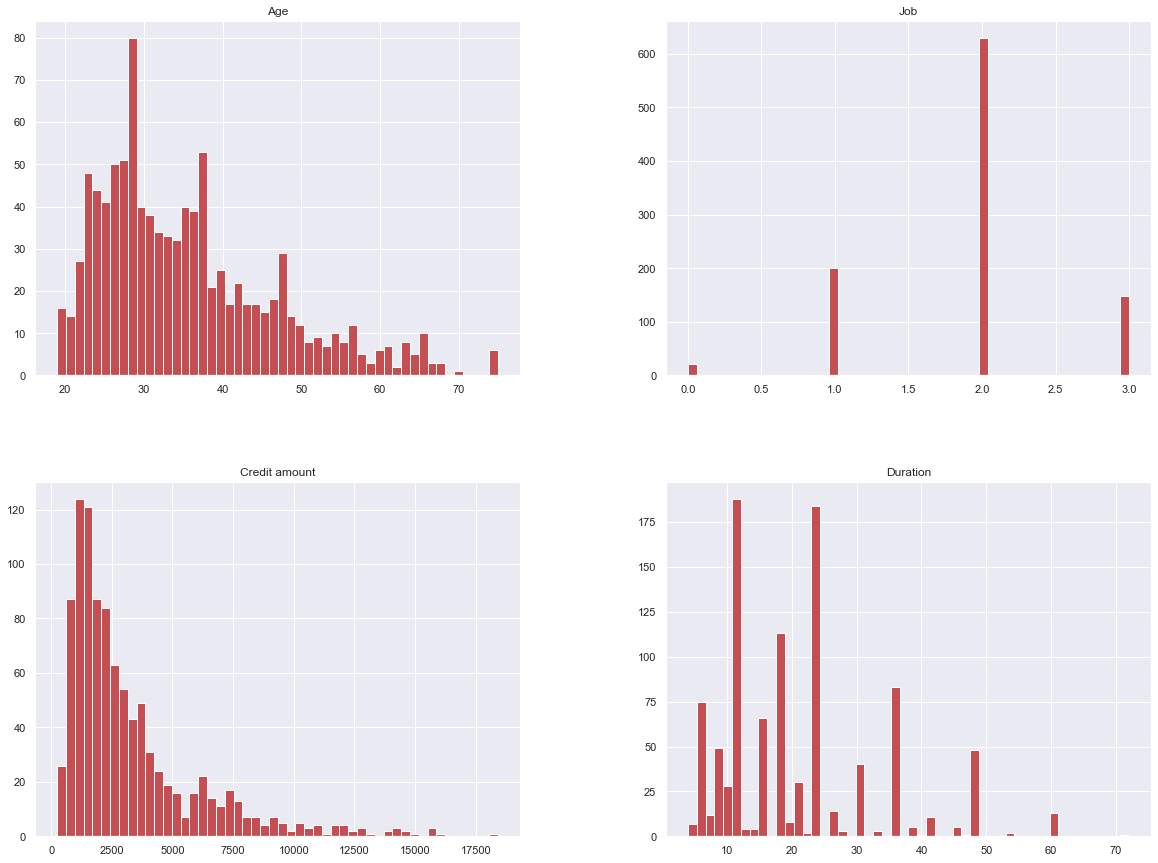

In [14]:
# checking distribution for all the variables in the data by plotting Histograms for all the variable
df.hist(bins=50, figsize=(20,15), color='r')
plt.show()
# Colclusion: Age, Credit amount and duration are right skewed

<AxesSubplot:>

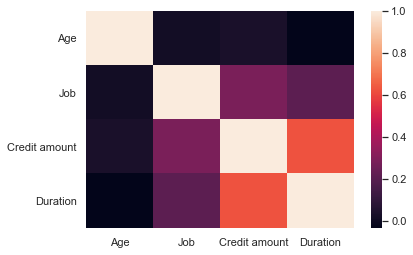

In [15]:
df_corr=df.corr()
sns.heatmap(df_corr)
# Response of the customers is highly dependent on duration of the contact

<h3>KNN Classification Algorithm</h3>

In [16]:
# Dividing the dataset into independent variables and target variables
X= df.drop(['Risk'], axis=1)
y= df['Risk']

In [17]:
# Dividing the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
X_train.head()
# Training dataset contain a lot of categorical values which needs to be converted into numerical values to apply KNN classifier

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
298,43,male,2,own,little,NaN,2515,18,furniture/equipment
160,36,male,2,own,moderate,NaN,2872,24,radio/TV
268,45,male,3,own,little,little,8978,14,car
658,28,female,2,own,little,moderate,4221,30,business
996,40,male,3,own,little,little,3857,30,car


In [19]:
# Using LabelEncoder to convert categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)
X_train[cat_atr].head()

C:\Users\Yogesh\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Sex,Housing,Saving accounts,Checking account,Purpose
298,1,1,0,3,4
160,1,1,1,3,5
268,1,1,0,0,1
658,0,1,0,1,0
996,1,1,0,0,1


In [20]:
# Using StandardScaler for normal distribution of numerical data
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
stds.fit_transform(X_train[num_atr])

array([[ 0.63900496,  0.12691022, -0.26133   , -0.25014702],
       [ 0.03235468,  0.12691022, -0.13382884,  0.25645135],
       [ 0.81233361,  1.68728173,  2.04690532, -0.58787926],
       ...,
       [ 0.89899793, -1.4334613 ,  0.12403065, -0.5034462 ],
       [-0.48763127,  1.68728173, -0.50847511,  0.25645135],
       [ 0.11901901,  0.12691022, -0.40954564, -0.25014702]])

In [21]:
a1 = X_train[cat_atr]
b1 = stds.transform(X_train[num_atr])

x_train = np.hstack([a1,b1])

In [22]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [23]:
# As testing dataset also contain categorical values it also needs to be converted into numerical values to apply KNN classifier
# Using LabelEncoder to convert categorical values of testing into numerical values

X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
X_test[cat_atr].head()

C:\Users\Yogesh\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Sex,Housing,Saving accounts,Checking account,Purpose
507,1,1,1,1,1
818,1,1,0,0,7
452,1,1,0,3,4
368,1,1,0,0,4
242,1,0,0,0,1


In [24]:
# Using StandardScaler for normal distribution of numerical data in testing data
stds.fit_transform(X_test[num_atr])

array([[-1.20257351e-01,  1.65863149e+00,  1.21571486e+00,
        -4.52217038e-01],
       [ 7.09739701e-01,  1.65863149e+00,  4.33970025e+00,
         1.20686015e+00],
       [-1.20257351e-01,  2.03691587e-01, -2.03206458e-01,
        -6.89228064e-01],
       [ 6.17517807e-01,  2.03691587e-01,  3.50724329e-02,
         1.20686015e+00],
       [-1.04247630e+00,  2.03691587e-01,  4.37059674e-01,
         2.15490425e+00],
       [ 7.09739701e-01, -1.25124832e+00, -6.93984668e-01,
        -6.89228064e-01],
       [ 6.41864387e-02,  1.65863149e+00,  6.78806962e-01,
        -2.15206012e-01],
       [-8.58032508e-01,  2.03691587e-01, -8.45553628e-01,
        -1.00524277e+00],
       [-3.04701140e-01,  2.03691587e-01, -9.17002611e-01,
        -6.89228064e-01],
       [-6.73588719e-01,  2.03691587e-01, -4.41138509e-01,
        -6.89228064e-01],
       [-1.20257351e-01,  2.03691587e-01, -5.21258485e-01,
         1.20686015e+00],
       [-7.65810613e-01,  1.65863149e+00,  2.46672412e-02,
      

In [25]:
a2 = X_test[cat_atr]
b2 = stds.transform(X_test[num_atr])

x_test = np.hstack([a2,b2])

In [26]:
# predicting the values now using testing data
y_pred = knn.predict(x_test)

In [27]:
#Checking the predicted values
y_pred

array(['good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'bad', 'good'

<h3>Performance measures for KNN Classifier Algorithm</h3>

In [28]:
#Using confussion matrix to compare predicted values of target varable with testing values of target variable
confusion_matrix(y_test, y_pred)

array([[ 27,  47],
       [ 23, 153]], dtype=int64)

In [29]:
# Checking the accuracy of algorithm
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# Getting 72% accuracy

0.72

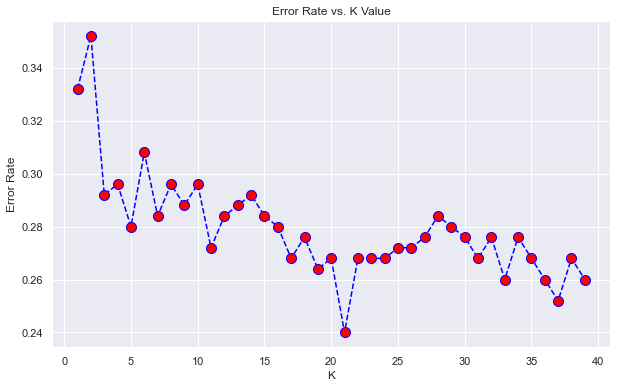

Minimum error:- 0.24 at K = 21


In [30]:
# Plotting graph for 'Error Rate vs. K Value' to check most accurate K value
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [34]:
# Using nearest value as 9 to predict the values again
knn = KNeighborsClassifier(n_neighbors=21, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

In [35]:
# predicting the values after setting n_neighbors=9
y_pred = knn.predict(x_test)

In [36]:
# Checking the accuracy of algorithm
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# Accuracy improved from 72% to 76%

0.76